In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
options(scipen=999)

# Sampling registered user revisions to plot out time difference between edits

In [5]:
sample_registered_user_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_registered_user_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [6]:
sample_registered_user_revision_session_data$cast_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [7]:
sample_registered_user_revision_session_data$cast_previous_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [8]:
sample_registered_user_revision_session_data$time_difference <- as.numeric(sample_registered_user_revision_session_data$cast_timestamp - sample_registered_user_revision_session_data$cast_previous_timestamp)

In [9]:
sample_registered_user_revision_session_data$log_time_difference <- log10(sample_registered_user_revision_session_data$time_difference + 1)

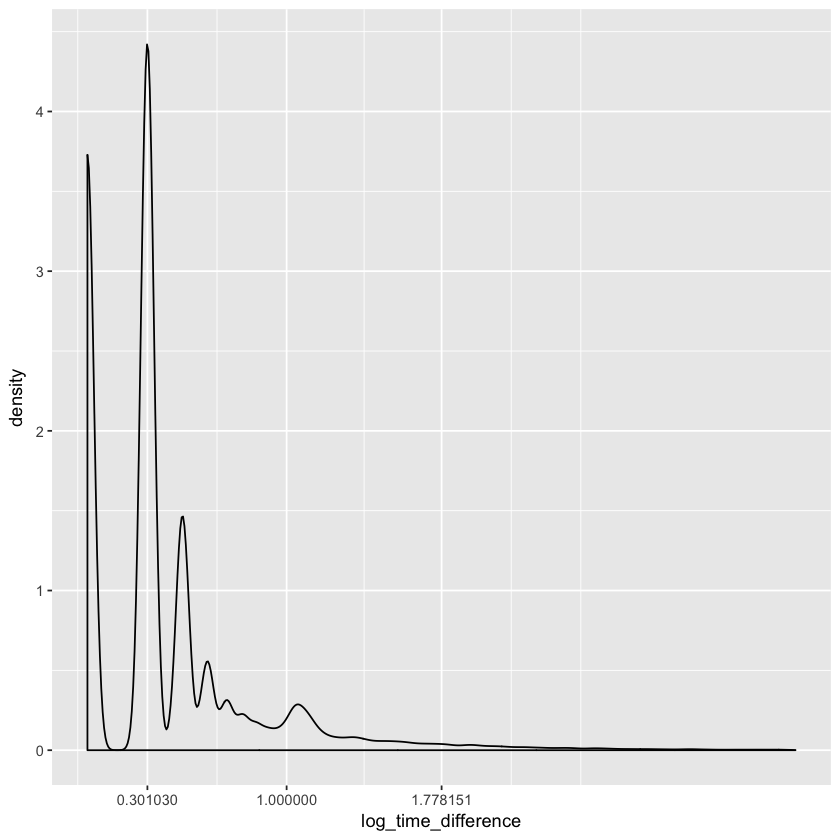

In [10]:
ggplot(sample_registered_user_revision_session_data[sample_registered_user_revision_session_data$prev_timestamp != 'NULL' & 
                                                    sample_registered_user_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_density() + 
scale_x_continuous(breaks=log10(c(2,10,60)))

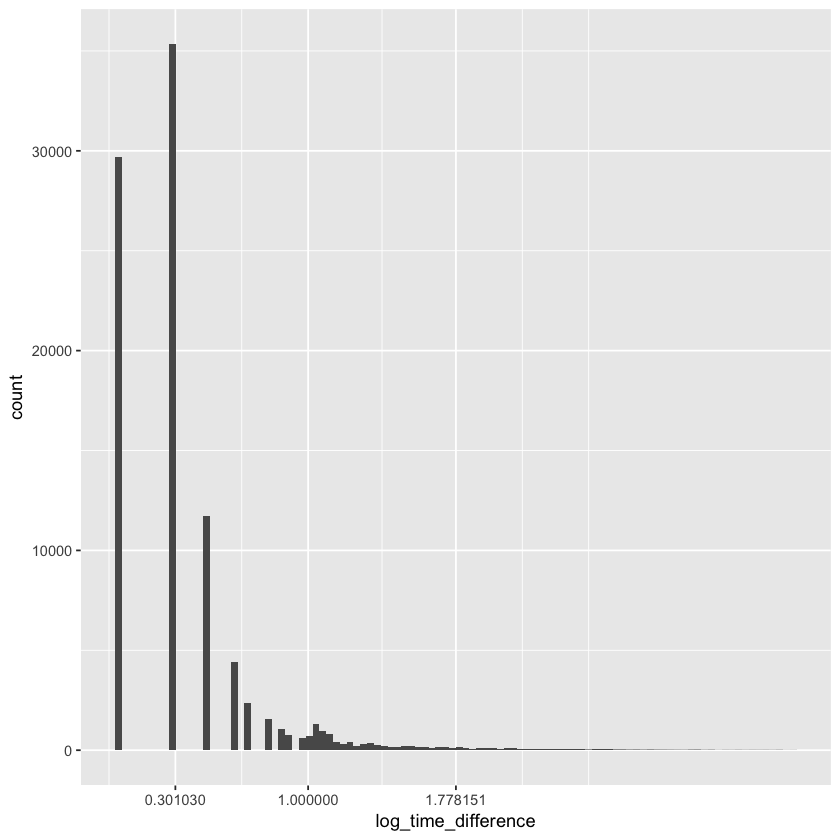

In [11]:
ggplot(sample_registered_user_revision_session_data[sample_registered_user_revision_session_data$prev_timestamp != 'NULL' & 
                                                    sample_registered_user_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(2,10,60)))

# Sampling anon revisions to plot out time difference between edits

In [12]:
sample_anon_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_anon_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [13]:
sample_anon_revision_session_data$cast_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [14]:
sample_anon_revision_session_data$cast_previous_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [15]:
sample_anon_revision_session_data$time_difference <- as.numeric(sample_anon_revision_session_data$cast_timestamp - sample_anon_revision_session_data$cast_previous_timestamp)

In [16]:
sample_anon_revision_session_data$log_time_difference <- log10(sample_anon_revision_session_data$time_difference + 1)

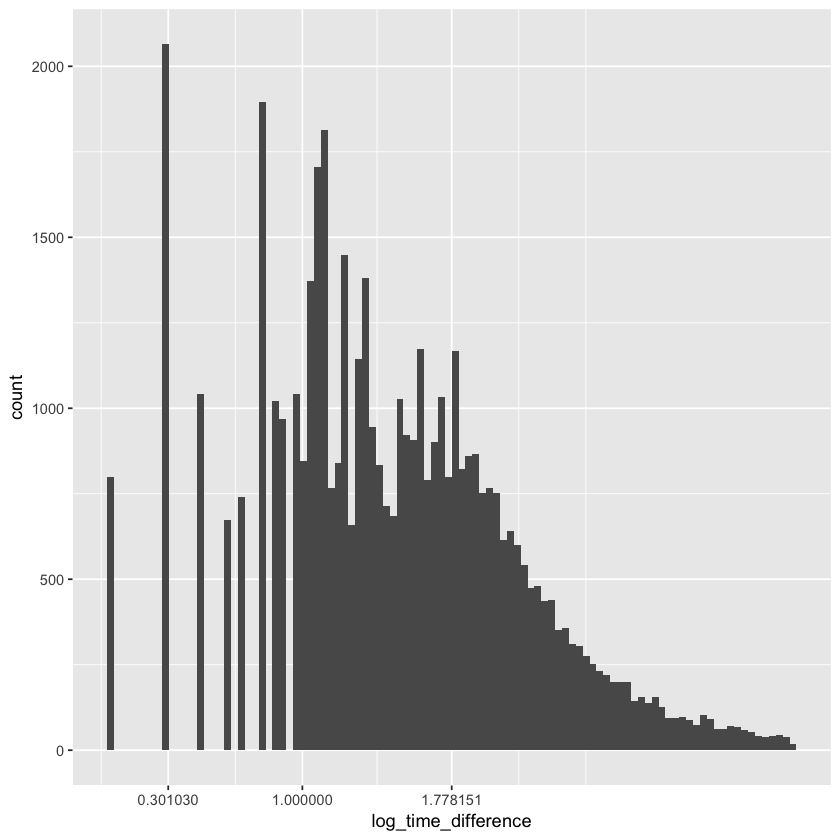

In [17]:
ggplot(sample_anon_revision_session_data[sample_anon_revision_session_data$prev_timestamp != 'NULL' & 
                                         sample_anon_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(2,10,60)))

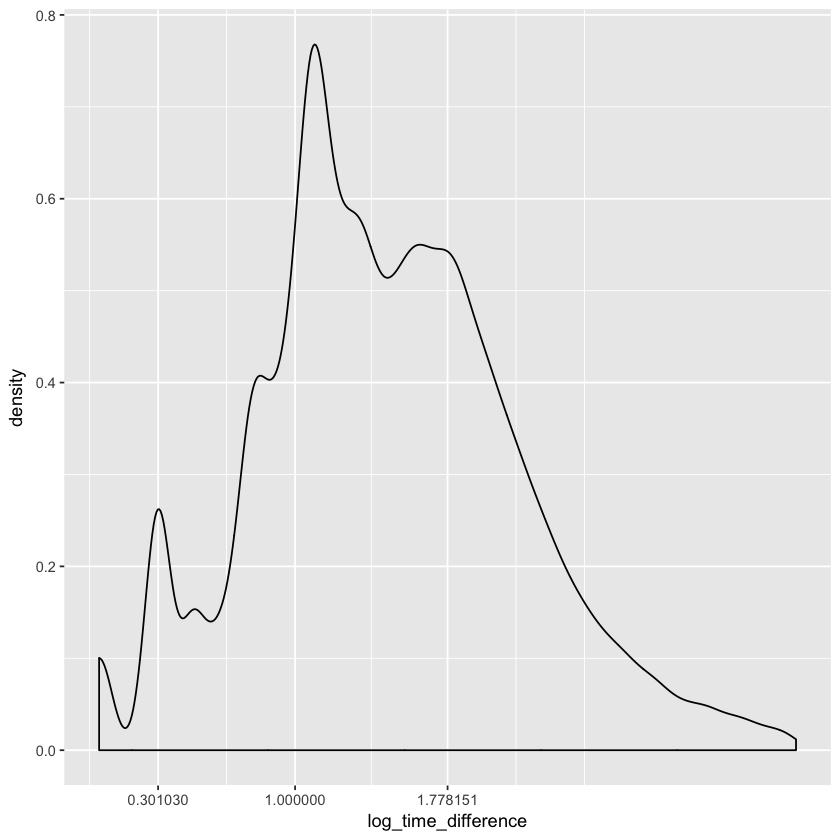

In [18]:
ggplot(sample_anon_revision_session_data[sample_anon_revision_session_data$prev_timestamp != 'NULL' & 
                                         sample_anon_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_density() + 
scale_x_continuous(breaks=log10(c(2,10,60)))

# Sampling human revisions to plot out time difference between edits

In [19]:
sample_human_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_human_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [20]:
sample_human_revision_session_data$cast_timestamp <- as.POSIXct(as.character(sample_human_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [21]:
sample_human_revision_session_data$cast_previous_timestamp <- as.POSIXct(as.character(sample_human_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [22]:
sample_human_revision_session_data$time_difference <- as.numeric(sample_human_revision_session_data$cast_timestamp - sample_human_revision_session_data$cast_previous_timestamp)

In [23]:
sample_human_revision_session_data$log_time_difference <- log10(sample_human_revision_session_data$time_difference + 1)

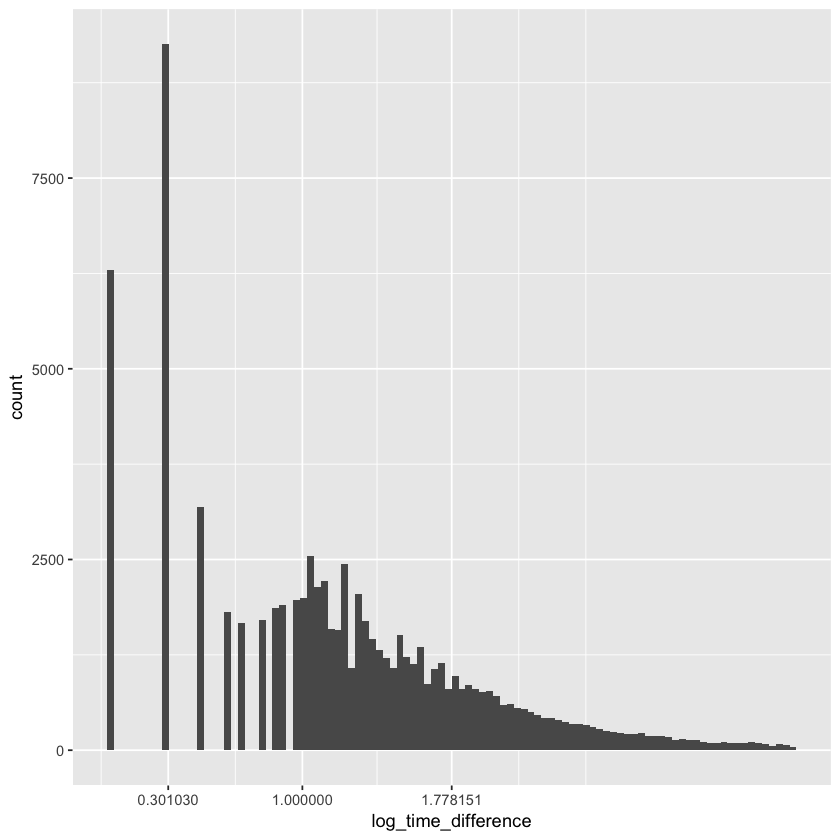

In [53]:
ggplot(sample_human_revision_session_data[sample_human_revision_session_data$prev_timestamp != 'NULL' & 
                                         sample_human_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(2,10,60)))

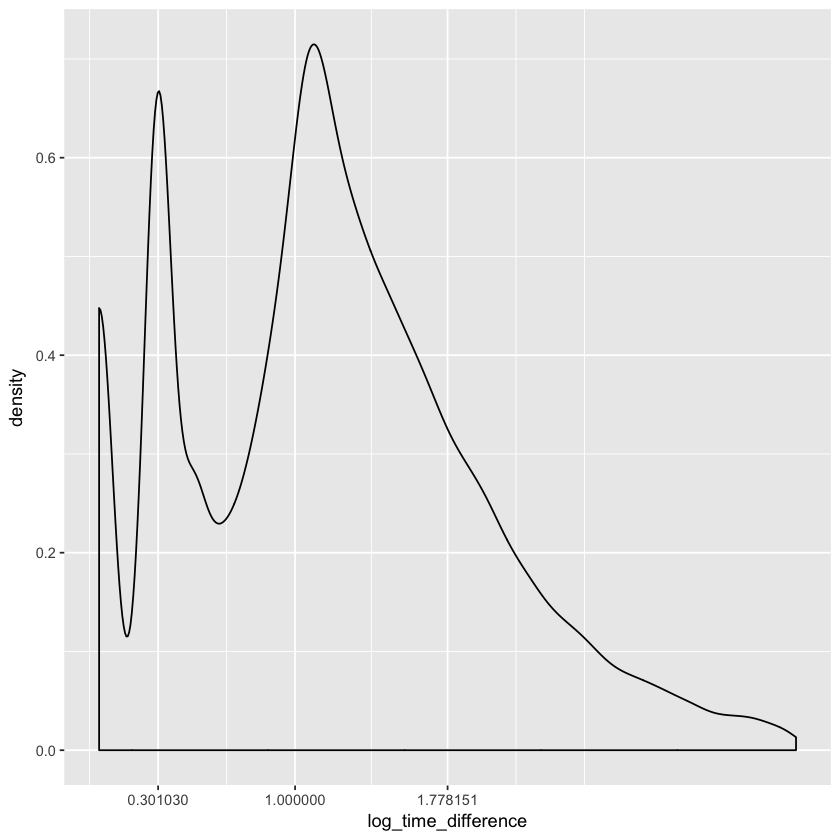

In [25]:
ggplot(sample_human_revision_session_data[sample_human_revision_session_data$prev_timestamp != 'NULL' & 
                                         sample_human_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_density() + 
scale_x_continuous(breaks=log10(c(2,10,60)))

# Sampling property revisions to plot out time difference between edits

In [26]:
sample_all_property_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_all_property_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [27]:
sample_all_property_revision_session_data$cast_timestamp <- as.POSIXct(as.character(sample_all_property_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [28]:
sample_all_property_revision_session_data$cast_previous_timestamp <- as.POSIXct(as.character(sample_all_property_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [29]:
sample_all_property_revision_session_data$time_difference <- as.numeric(sample_all_property_revision_session_data$cast_timestamp - sample_all_property_revision_session_data$cast_previous_timestamp)

In [30]:
sample_all_property_revision_session_data$log_time_difference <- log10(sample_all_property_revision_session_data$time_difference + 1)

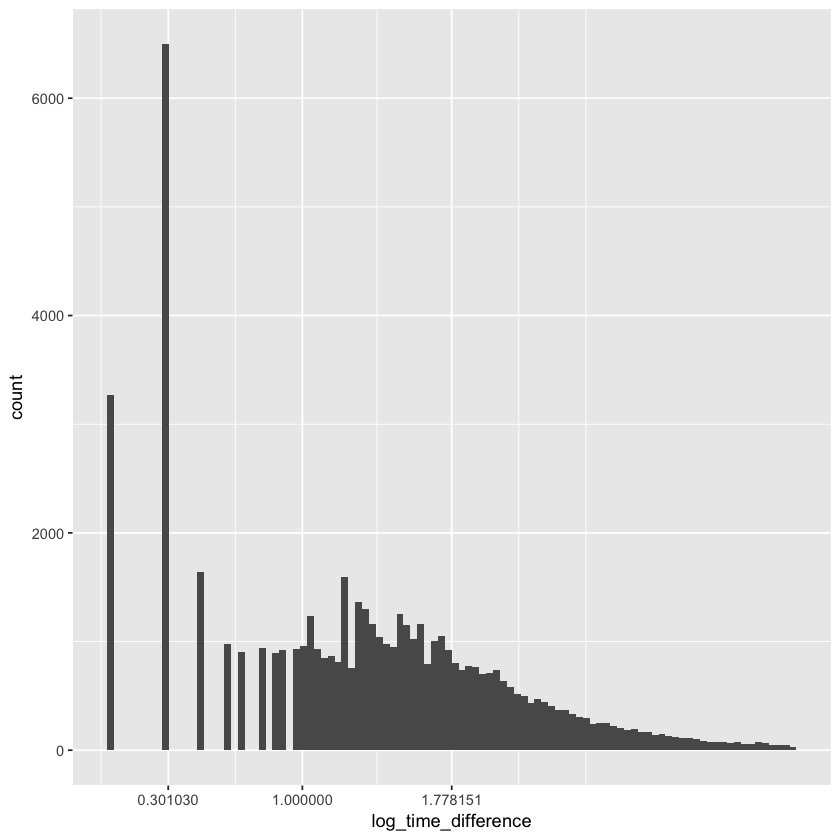

In [51]:
ggplot(sample_all_property_revision_session_data[sample_all_property_revision_session_data$prev_timestamp != 'NULL' & 
                                                 sample_all_property_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(2,10,60)))

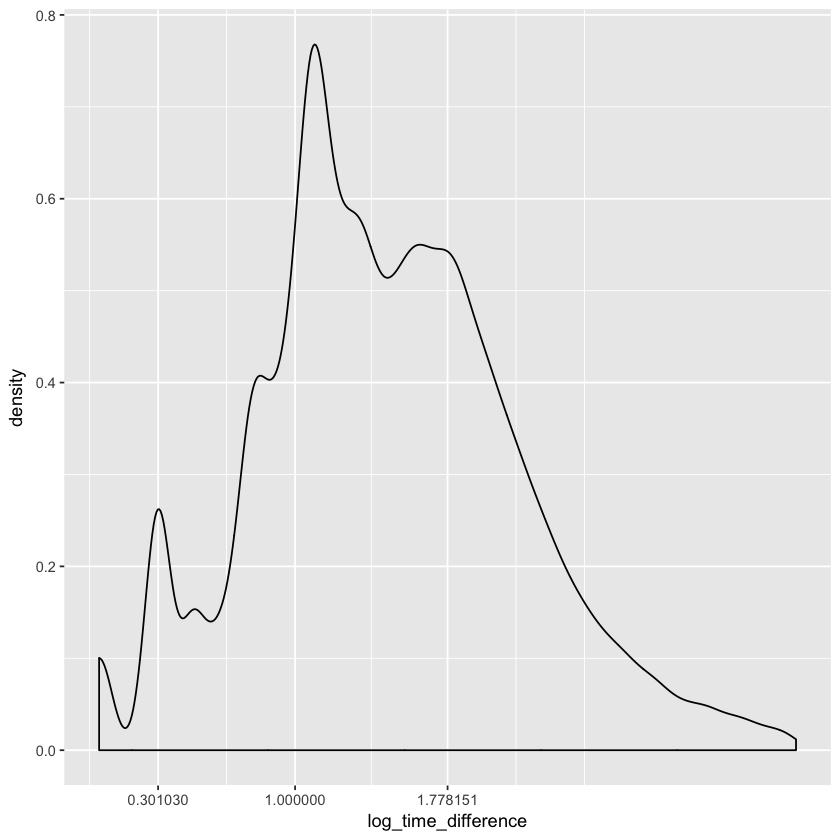

In [33]:
ggplot(sample_anon_revision_session_data[sample_anon_revision_session_data$prev_timestamp != 'NULL' & 
                                         sample_anon_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_density() + 
scale_x_continuous(breaks=log10(c(2,10,60)))

# Sampling human property revisions to plot out time difference between edits

In [35]:
sample_human_property_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_human_property_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [36]:
sample_human_property_revision_session_data$cast_timestamp <- as.POSIXct(as.character(sample_human_property_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [37]:
sample_human_property_revision_session_data$cast_previous_timestamp <- as.POSIXct(as.character(sample_human_property_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [42]:
sample_human_property_revision_session_data$time_difference <- as.numeric(sample_human_property_revision_session_data$cast_timestamp - sample_human_property_revision_session_data$cast_previous_timestamp)

In [43]:
sample_human_property_revision_session_data$log_time_difference <- log10(sample_human_property_revision_session_data$time_difference + 1)

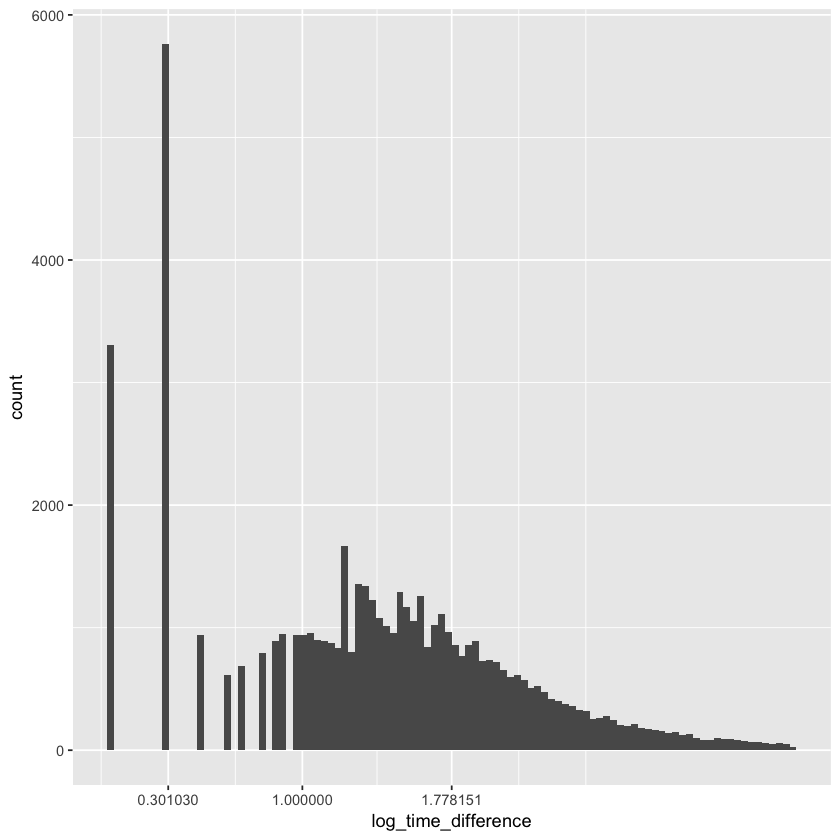

In [47]:
ggplot(sample_human_property_revision_session_data[sample_human_property_revision_session_data$prev_timestamp != 'NULL' & 
                                                 sample_human_property_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(2,10,60)))

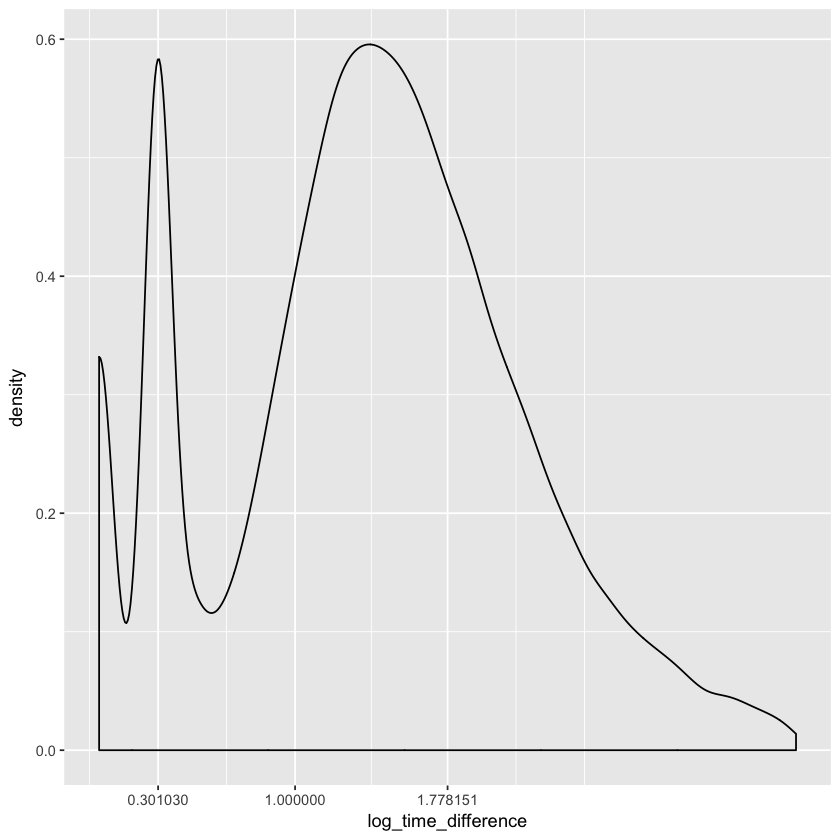

In [45]:
ggplot(sample_human_property_revision_session_data[sample_human_property_revision_session_data$prev_timestamp != 'NULL' & 
                                         sample_human_property_revision_session_data$session_events >= 10,],
       aes(x=log_time_difference)) +
geom_density() + 
scale_x_continuous(breaks=log10(c(2,10,60)))